In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("../data/sales_train_validation.csv")
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [3]:
attributes_dict = {
    'cat_ids': data['cat_id'].unique().tolist(),
    'state_ids': data['state_id'].unique().tolist(),
    'store_ids': data['store_id'].unique().tolist(),
    'dept_ids': data['dept_id'].unique().tolist()
}
attributes_dict

{'cat_ids': ['HOBBIES', 'HOUSEHOLD', 'FOODS'],
 'state_ids': ['CA', 'TX', 'WI'],
 'store_ids': ['CA_1',
  'CA_2',
  'CA_3',
  'CA_4',
  'TX_1',
  'TX_2',
  'TX_3',
  'WI_1',
  'WI_2',
  'WI_3'],
 'dept_ids': ['HOBBIES_1',
  'HOBBIES_2',
  'HOUSEHOLD_1',
  'HOUSEHOLD_2',
  'FOODS_1',
  'FOODS_2',
  'FOODS_3']}

## Sale of item in a store

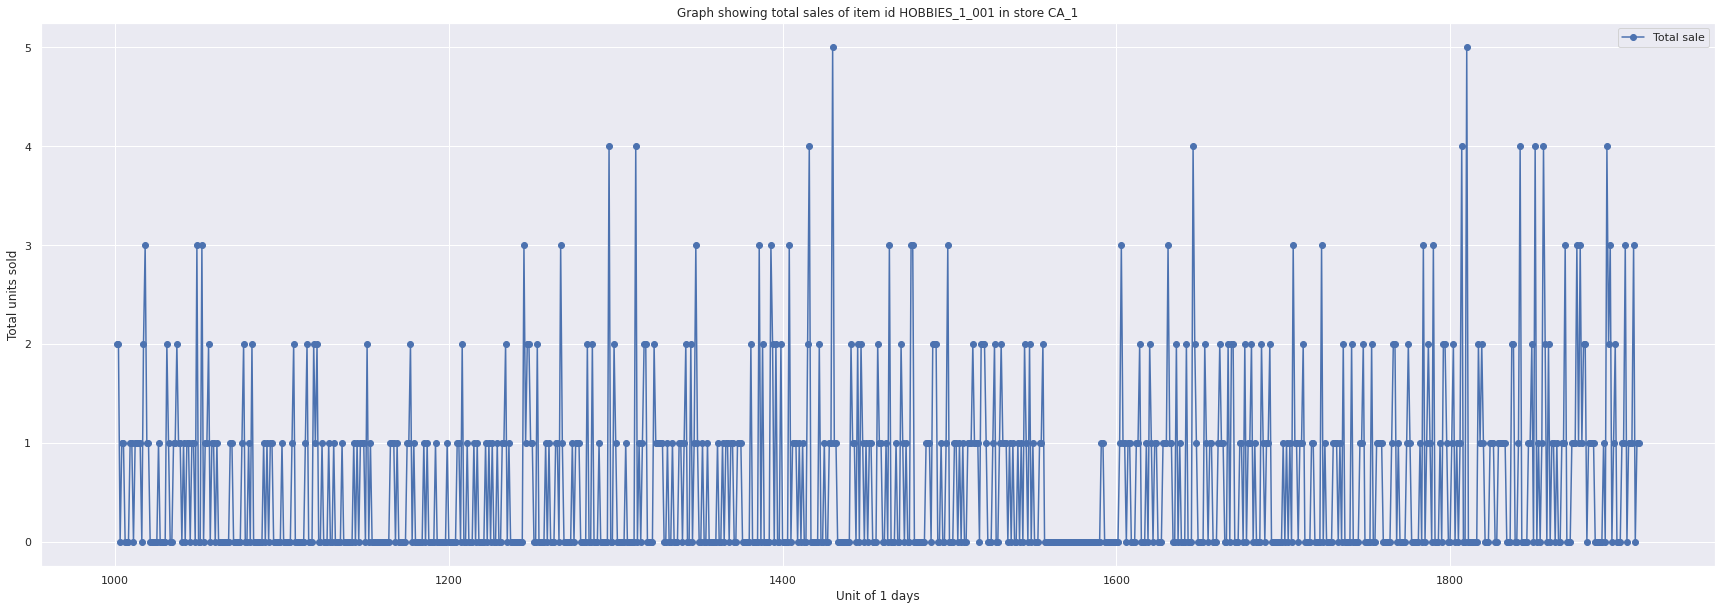

In [4]:
item_id = "HOBBIES_1_001"
store_id = "CA_1"
example_data = data[(data['item_id'] == item_id) & (data['store_id'] == store_id)].to_numpy()[0][6:]
example_data.shape

_max = 1913
start = 1000
end = 1913
x = range(1, _max + 1)
plt.figure(figsize=(30,10))
plt.plot(x[start:end], example_data[start:end],label='Total sale',marker='o')
plt.legend() 
plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing total sales of item id {item_id} in store {store_id}')
plt.show()

## Sale of whole dept from a store

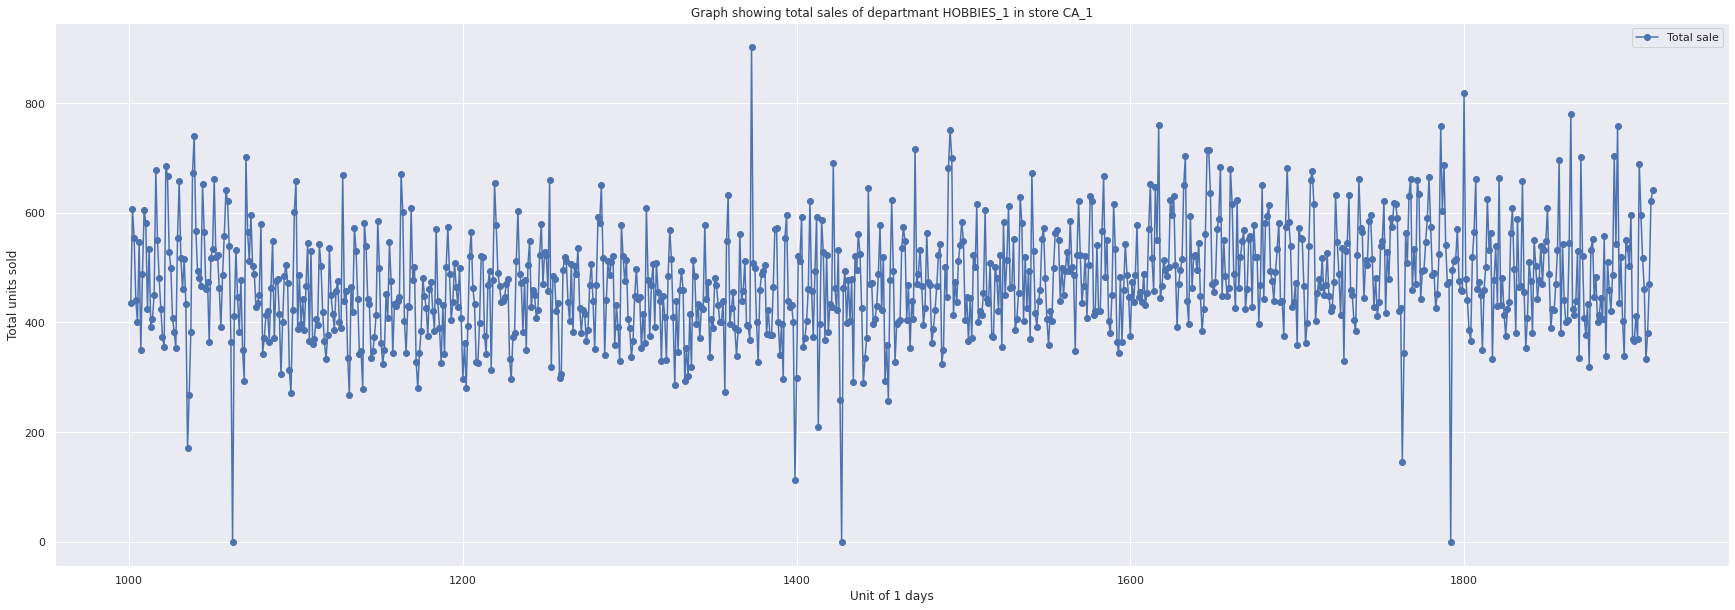

In [5]:
dept_id = "HOBBIES_1"
store_id = "CA_1"
example_data = data[(data['dept_id'] == dept_id) & (data['store_id'] == store_id)].to_numpy()[:,6:]
example_data.shape
y = np.sum(example_data, axis = 0)
y.shape

start = 1000
end = 1913
_max = 1913
x = range(1, _max + 1)
plt.figure(figsize=(30,10))
plt.plot(x[start:end], y[start:end],label='Total sale',marker='o')
plt.legend() 

plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing total sales of departmant {dept_id} in store {store_id}')
plt.show()

## Sale of category in a store

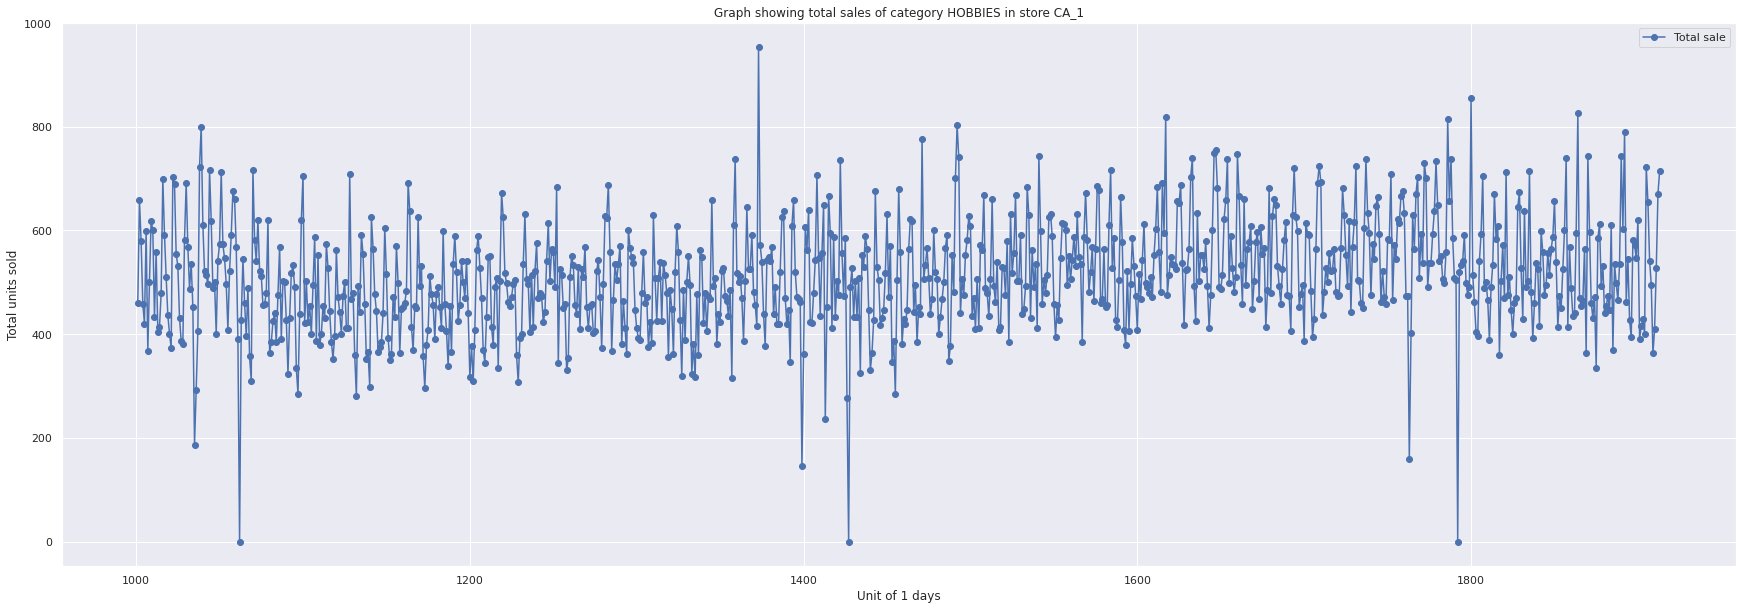

In [6]:
cat_id = "HOBBIES"
store_id = "CA_1"
category_store = data[(data['cat_id'] == cat_id) & (data['store_id'] == store_id)].to_numpy()[:,6:]
category_store.shape
y1 = np.sum(category_store, axis = 0)

start = 1000
end = 1913
_max = 1913
x = range(1, _max + 1)
plt.figure(figsize=(30,10))
plt.plot(x[start:end], y1[start:end],label='Total sale',marker='o')
plt.legend() 
plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing total sales of category {cat_id} in store {store_id}')
plt.show()


## Comparison of categories in same state for different stores

In [7]:
cat_id = "HOBBIES"

store_id_1 = "CA_1"
category_state = data[(data['cat_id'] == cat_id) & (data['store_id'] == store_id_1)].to_numpy()[:,6:]
category_state.shape
y3 = np.sum(category_state, axis = 0)
print(y3.shape)

store_id_2 = "CA_2"
category_state = data[(data['cat_id'] == cat_id) & (data['store_id'] == store_id_2)].to_numpy()[:,6:]
category_state.shape
y4 = np.sum(category_state, axis = 0)
print(y4.shape)

store_id_3 = "CA_3"
category_state = data[(data['cat_id'] == cat_id) & (data['store_id'] == store_id_3)].to_numpy()[:,6:]
category_state.shape
y5 = np.sum(category_state, axis = 0)
print(y5.shape)

store_id_4 = "CA_4"
category_state = data[(data['cat_id'] == cat_id) & (data['store_id'] == store_id_4)].to_numpy()[:,6:]
category_state.shape
y6 = np.sum(category_state, axis = 0)
print(y6.shape)

(1913,)
(1913,)
(1913,)
(1913,)


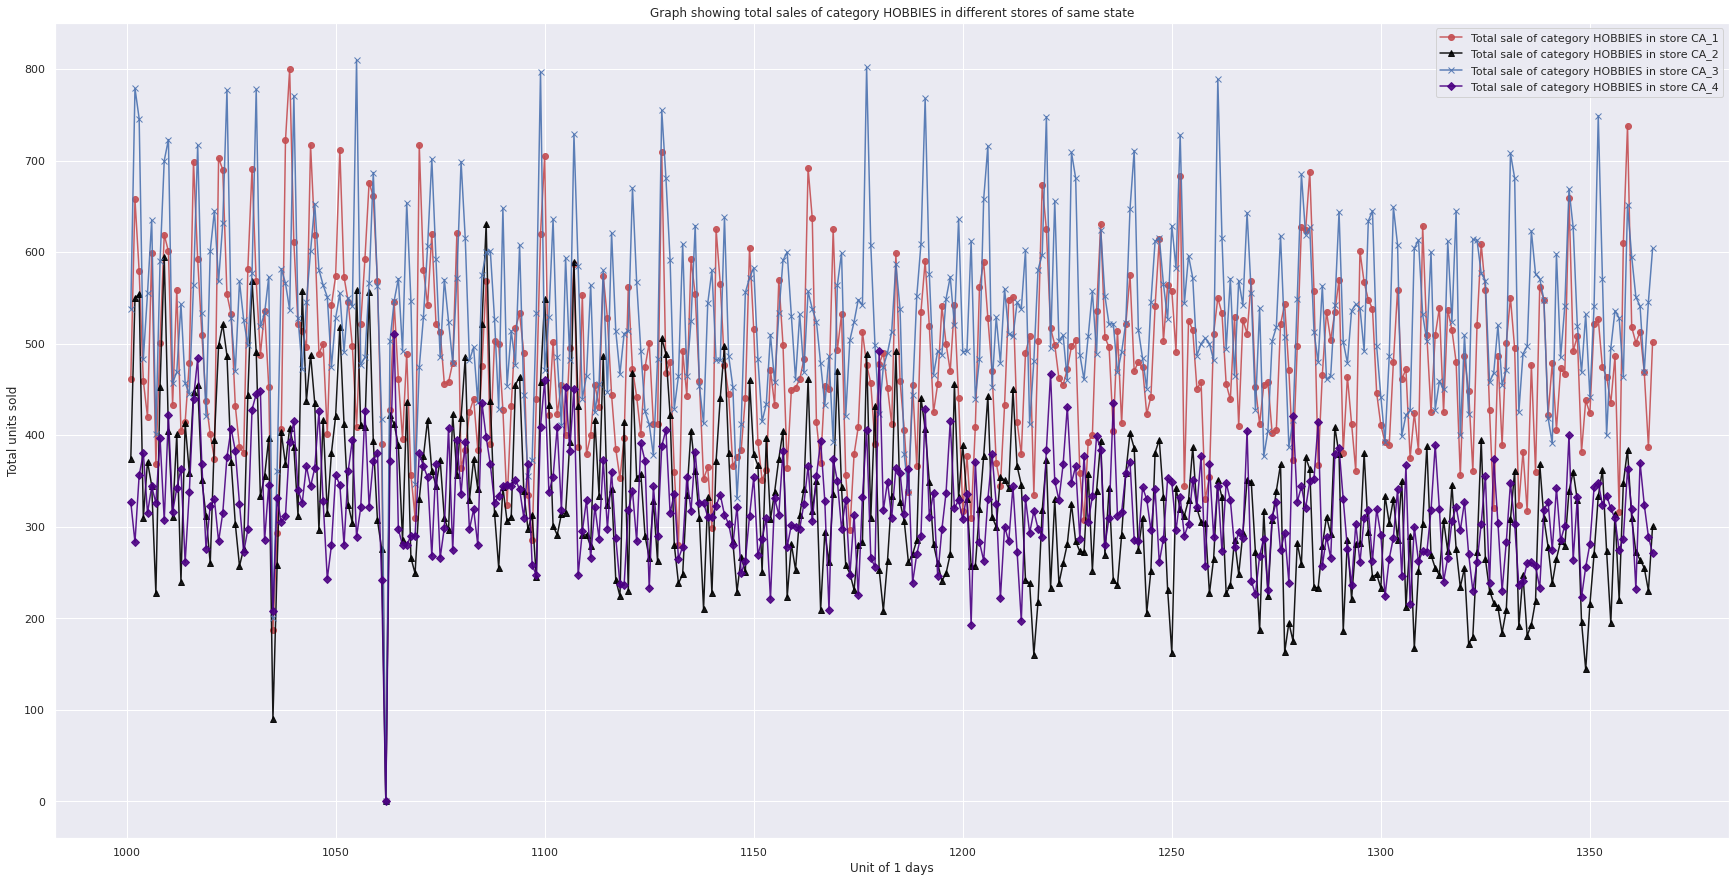

In [9]:
start = 1000
end = start + 365
_max = 1913

x = range(1, _max + 1)

plt.figure(figsize=(30, 15))
# plt.vlines(x[start:end], ymin=0, ymax=800)

plt.plot(x[start:end], y3[start:end] ,label=f'Total sale of category {cat_id} in store {store_id_1}',marker='o', c="r", alpha=0.9)
plt.plot(x[start:end], y4[start:end] ,label=f'Total sale of category {cat_id} in store {store_id_2}',marker='^', c="black", alpha=0.9)
plt.plot(x[start:end], y5[start:end] ,label=f'Total sale of category {cat_id} in store {store_id_3}',marker='x', c="b", alpha=0.9)
plt.plot(x[start:end], y6[start:end] ,label=f'Total sale of category {cat_id} in store {store_id_4}',marker='D', c="indigo", alpha=0.9)


plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.legend() 
plt.title(f'Graph showing total sales of category {cat_id} in different stores of same state')
plt.show()

## Comparison of sales for a category in a state

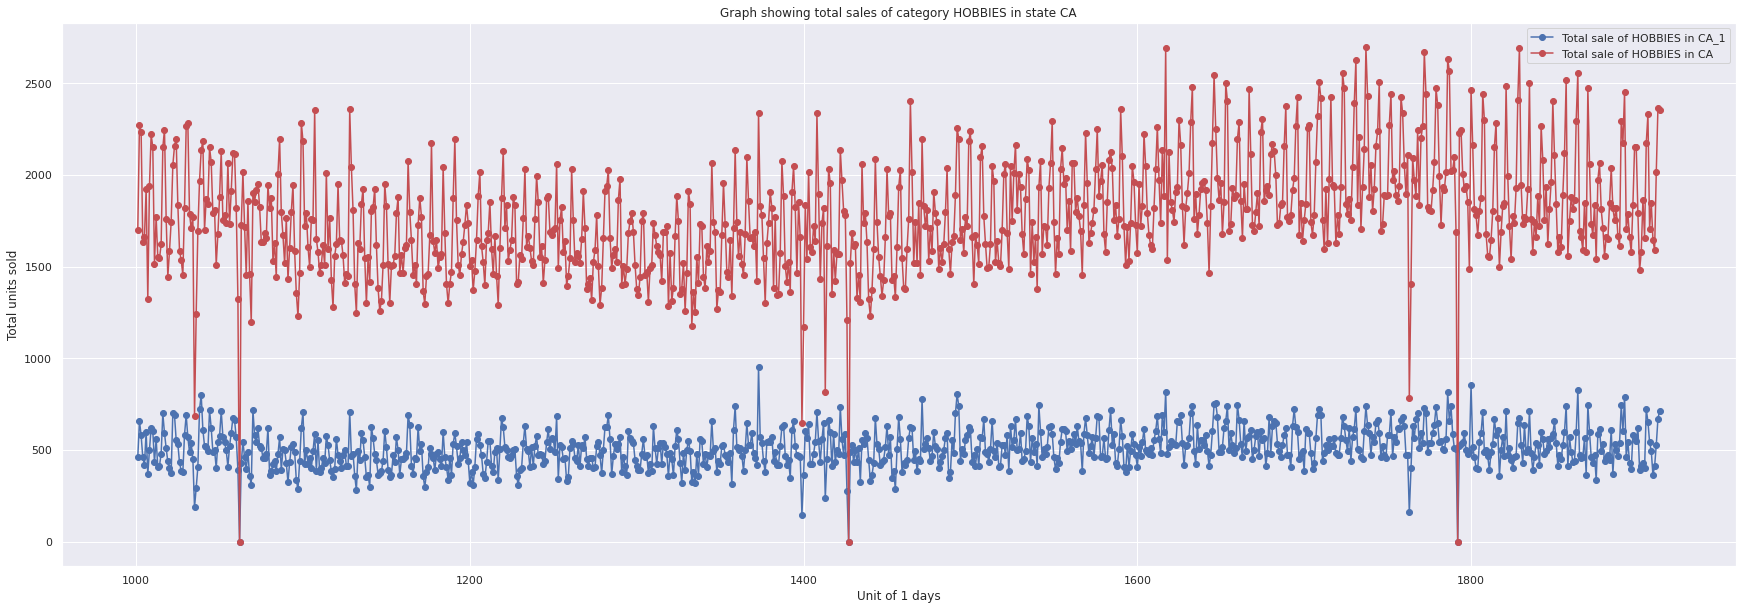

In [10]:
cat_id = "HOBBIES"
state_id = "CA"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id)].to_numpy()[:,6:]
category_state.shape
y2 = np.sum(category_state, axis = 0)

start = 1000
end = 1913
_max = 1913
x = range(1, _max + 1)
plt.figure(figsize=(30,10))
plt.plot(x[start:end], y1[start:end],label=f'Total sale of {cat_id} in {store_id}',marker='o', c='b')
plt.plot(x[start:end], y2[start:end],label=f'Total sale of {cat_id} in {state_id}',marker='o', c="r")
# plt.plot(x[start:end], y3[start:end],label=f'Total sale of {cat_id} in {state_id}',marker='o', c="r")
# plt.plot(x[start:end], y4[start:end],label=f'Total sale of {cat_id} in {state_id}',marker='o', c="r")
plt.legend() 
plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.title(f'Graph showing total sales of category {cat_id} in state {state_id}')
plt.show()

## Comparing same category in different states

In [18]:
cat_id = "HOBBIES"

state_id_1 = "CA"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_1)].to_numpy()[:,6:]
category_state.shape
y3 = np.sum(category_state, axis = 0)
print(y3.shape)

state_id_2 = "TX"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_2)].to_numpy()[:,6:]
category_state.shape
y4 = np.sum(category_state, axis = 0)
print(y4.shape)

state_id_3 = "WI"
category_state = data[(data['cat_id'] == cat_id) & (data['state_id'] == state_id_3)].to_numpy()[:,6:]
category_state.shape
y5 = np.sum(category_state, axis = 0)
print(y5.shape)

(1913,)
(1913,)
(1913,)


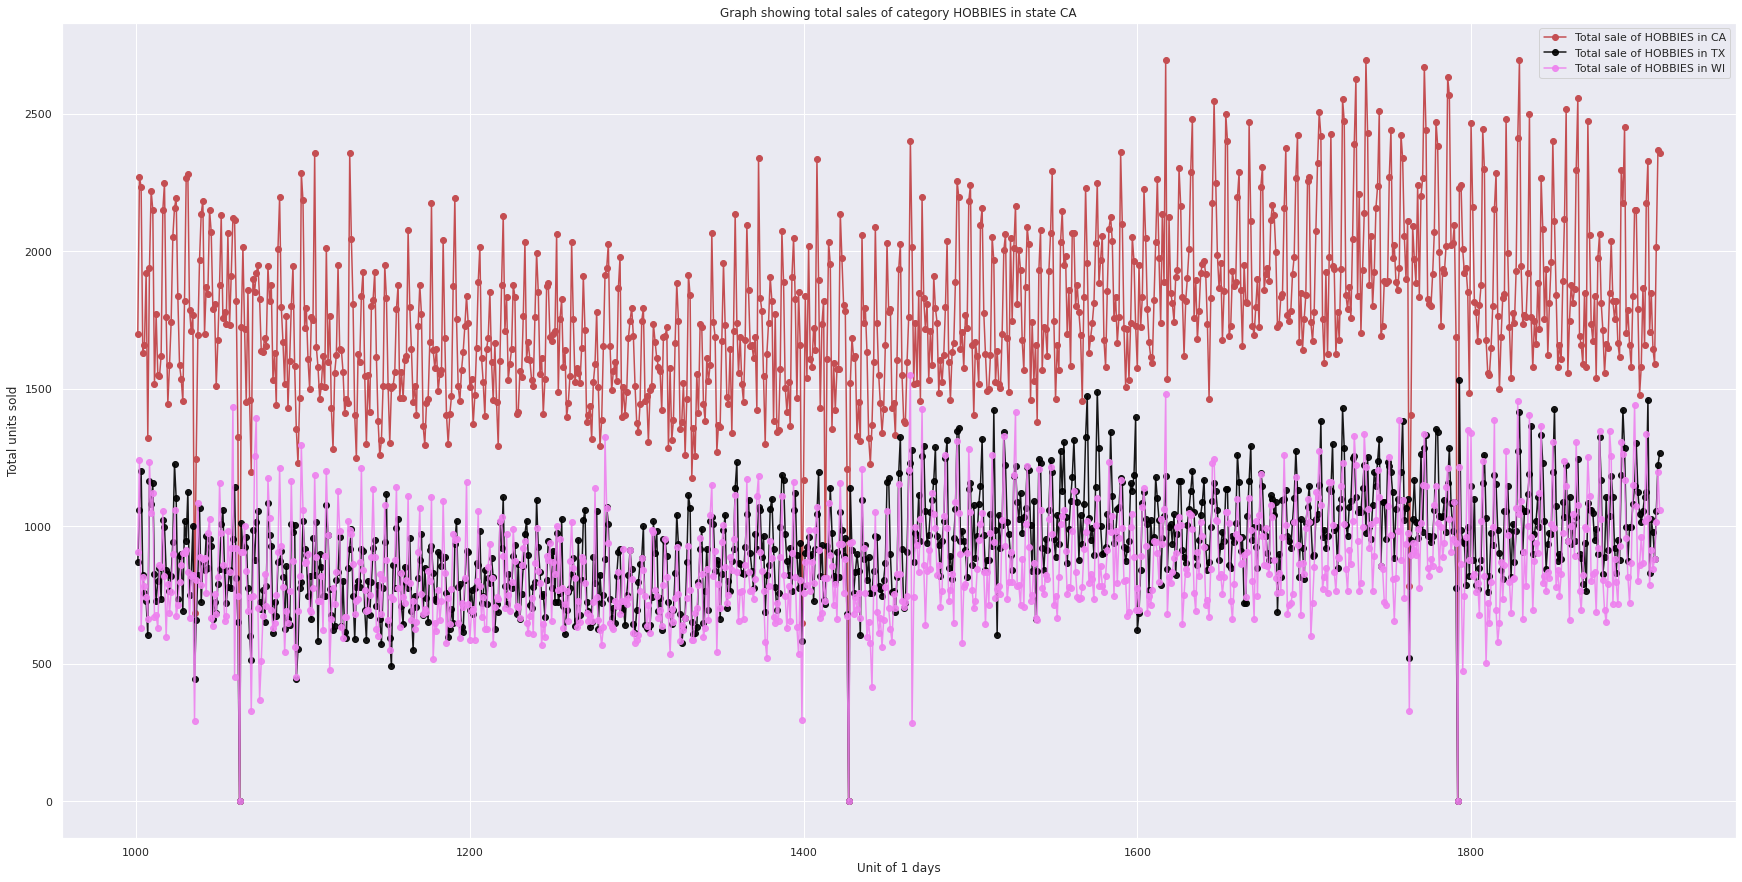

In [19]:
start = 1000
end = 1913
_max = 1913

x = range(1, _max + 1)

plt.figure(figsize=(30, 15))

plt.plot(x[start:end], y3[start:end] ,label=f'Total sale of {cat_id} in {state_id_1}',marker='o', c="r", alpha=1)
plt.plot(x[start:end], y4[start:end] ,label=f'Total sale of {cat_id} in {state_id_2}',marker='o', c="black", alpha=0.9)
plt.plot(x[start:end], y5[start:end] ,label=f'Total sale of {cat_id} in {state_id_3}',marker='o', c="violet", alpha=0.9)

plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.legend() 
plt.title(f'Graph showing total sales of category {cat_id} in state {state_id}')
plt.show()

In [20]:
def divide(a, b):
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)

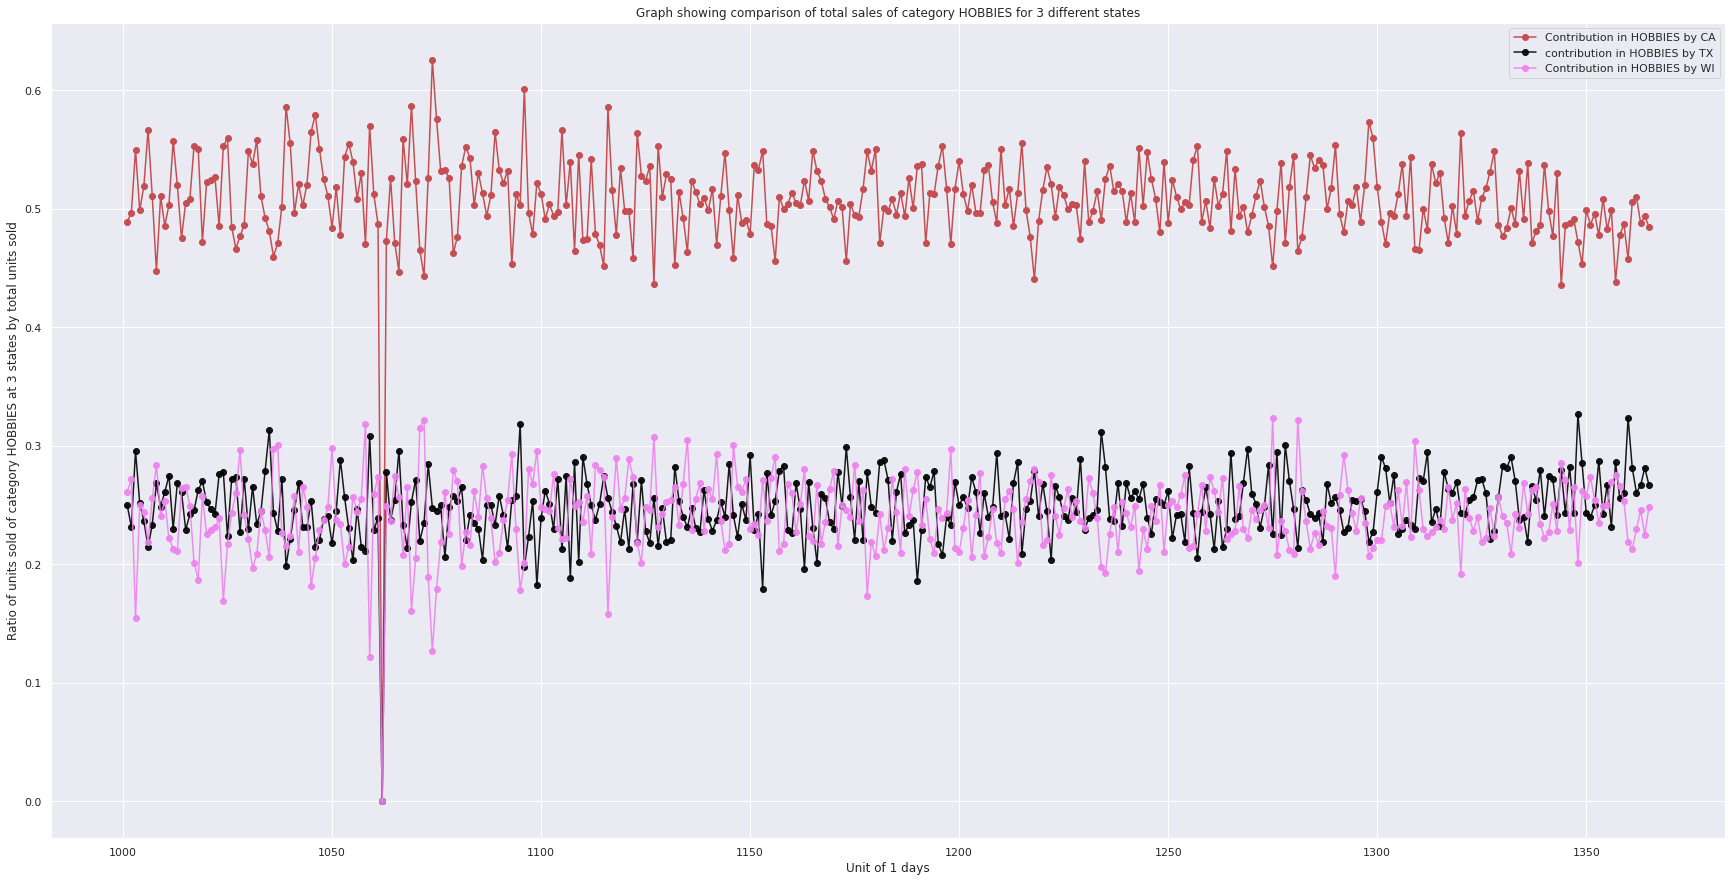

In [21]:
start = 1000
end = start+365
_max = 1913

x = range(1, _max + 1)

plt.figure(figsize=(30, 15))

plt.plot(x[start:end], divide(y3[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'Contribution in {cat_id} by {state_id_1}',marker='o', c="r", alpha=1)
plt.plot(x[start:end], divide(y4[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'contribution in {cat_id} by {state_id_2}',marker='o', c="black", alpha=0.9)
plt.plot(x[start:end], divide(y5[start:end], y3[start:end] + y4[start:end] + y5[start:end]),label=f'Contribution in {cat_id} by {state_id_3}',marker='o', c="violet", alpha=0.9)

plt.xlabel(f'Unit of 1 days')
plt.ylabel(f'Ratio of units sold of category {cat_id} at 3 states by total units sold')
plt.legend() 
plt.title(f'Graph showing comparison of total sales of category {cat_id} for 3 different states')
plt.show()

## Comparison of different categories in same state

In [22]:
state_id = "CA"

cat_id_1 = "HOBBIES"
category_state = data[(data['cat_id'] == cat_id_1) & (data['state_id'] == state_id)].to_numpy()[:,6:]
category_state.shape
y3 = np.sum(category_state, axis = 0)
print(y3.shape)

cat_id_2 = "FOODS"
category_state = data[(data['cat_id'] == cat_id_2) & (data['state_id'] == state_id)].to_numpy()[:,6:]
category_state.shape
y4 = np.sum(category_state, axis = 0)
print(y4.shape)

cat_id_3 = "HOUSEHOLD"
category_state = data[(data['cat_id'] == cat_id_3) & (data['state_id'] == state_id)].to_numpy()[:,6:]
category_state.shape
y5 = np.sum(category_state, axis = 0)
print(y5.shape)

(1913,)
(1913,)
(1913,)


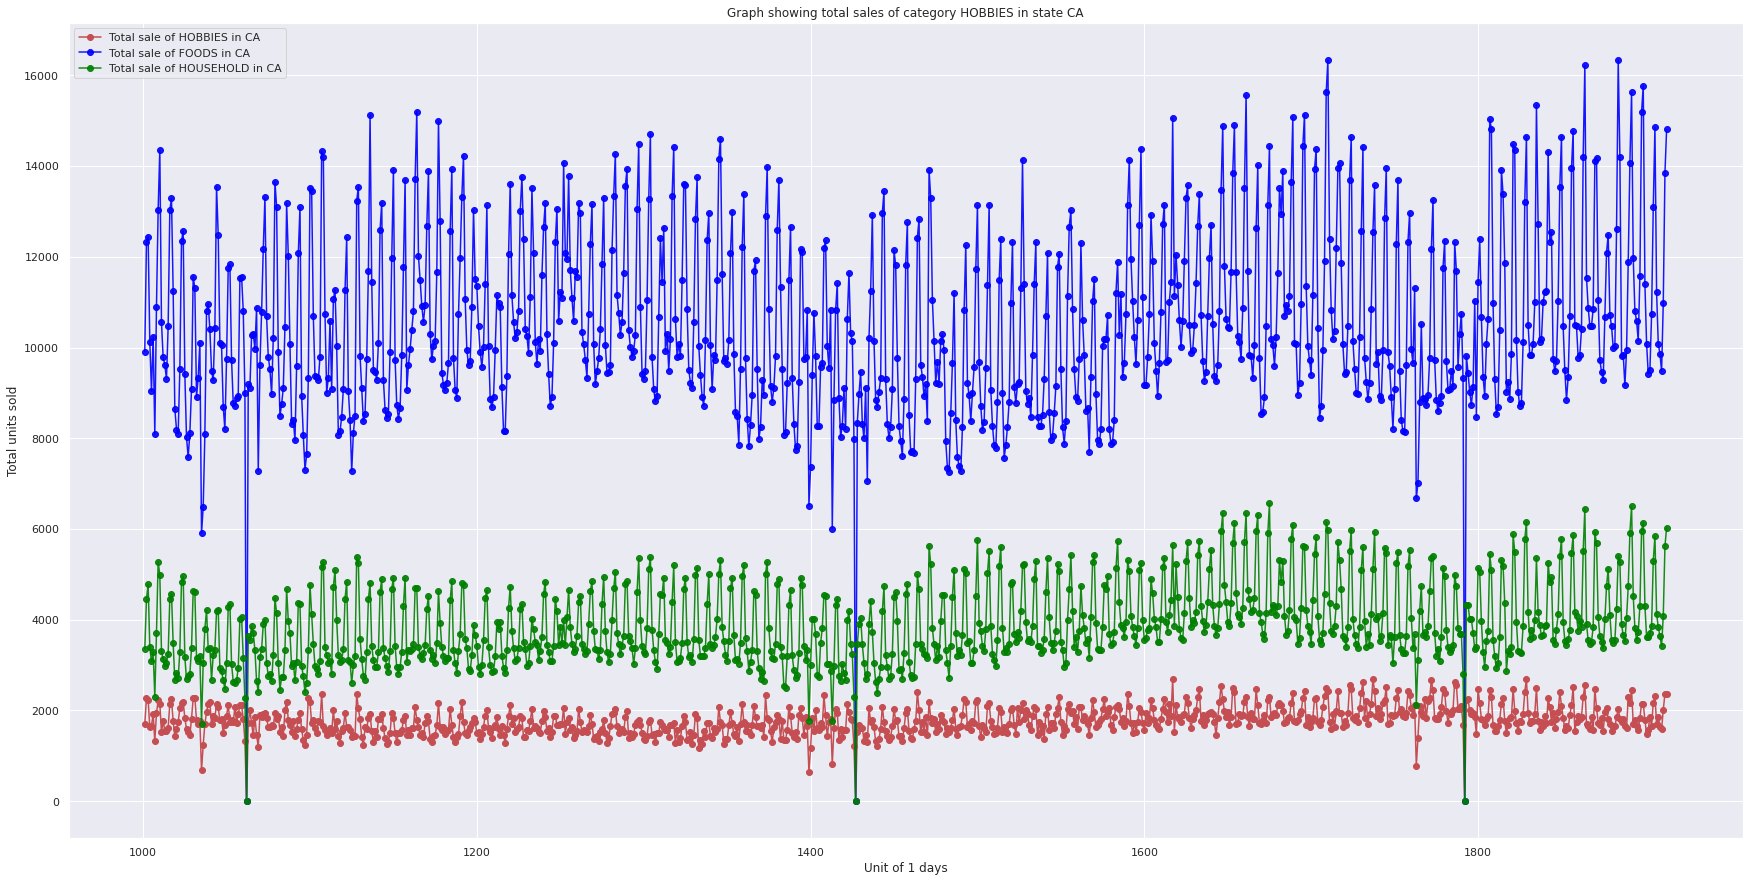

In [23]:
start = 1000
end = 1913
_max = 1913

x = range(1, _max + 1)

plt.figure(figsize=(30, 15))

plt.plot(x[start:end], y3[start:end] ,label=f'Total sale of {cat_id_1} in {state_id}',marker='o', c="r", alpha=1)
plt.plot(x[start:end], y4[start:end] ,label=f'Total sale of {cat_id_2} in {state_id}',marker='o', c="blue", alpha=0.9)
plt.plot(x[start:end], y5[start:end] ,label=f'Total sale of {cat_id_3} in {state_id}',marker='o', c="green", alpha=0.9)

plt.xlabel(f'Unit of 1 days')
plt.ylabel('Total units sold')
plt.legend() 
plt.title(f'Graph showing total sales of category {cat_id} in state {state_id}')
plt.show()